In [164]:
%matplotlib inline
import csv
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

TRAIN_FILE_PATH = "data/X_train.csv"
TARGET_FILE_PATH =  "data/y_train.csv"
TEST_FILE_PATH = "data/X_test.csv"

In [161]:
#Load train and test set
print("\nTrain Data\n")

train_data = pd.read_csv(TRAIN_FILE_PATH)
train_data.drop(train_data.columns[0], axis=1, inplace=True)

Y_train = pd.read_csv(TARGET_FILE_PATH)
Y_train.drop(Y_train.columns[0], axis=1, inplace = True)

print("\nTest Data\n")

test_data =  pd.read_csv(TEST_FILE_PATH)
id_test = test_data.columns[0]
test_data.drop(test_data.columns[0], axis=1, inplace=True)


Train Data

(1212, 887)
            x0             x1            x2           x3         x4  \
0  7077.537454  926681.139285  1.076365e+06  1029.624479  105.87744   

              x5          x6             x7             x8            x9  \
0  180486.413011  1084.60481  296933.955135  104840.111208  10736.380544   

       ...               x877          x878           x879        x880  \
0      ...       3.921803e+11  1.040522e+06 -437724.358877  957.470031   

            x881         x882       x883         x884          x885  \
0  988877.247939  3830.501971  98.622927  1771.079992  10008.297422   

           x886  
0  65052.593208  

[1 rows x 887 columns]

Test Data

(776, 887)
Amount of observations: 1212


In [128]:
# fill missing values with mean column values train and test set
def fill_NaN(train, test):
    print("Train shape: ", train.shape)
    print("Test shape: ",test.shape)
    train_mean_values = train.mean()
    train =  train.fillna(train_mean_values)
    test = test.fillna(train_mean_values)
    
    return train,test


In [ ]:
train_data_mean, test_data_mean = fill_NaN(train_data, test_data)

In [135]:
#Zero mean unit variance for train and test data
def scale_data(train, test):
    
    print("Train shape: ", train.shape)
    print("Test shape: ",test.shape)
    scaler = StandardScaler().fit(train, Y_train)
    #print(train_data_mean.shape)
    #print(test_data_mean.shape)
    train = scaler.transform(train)
    test = scaler.transform(test)
   
    return train, test

In [ ]:
X_train_scaled, X_test_scaled = scale_data(train_data_mean, test_data_mean)

(1212, 887)
(1212, 1)
[3.17463281e+02 3.09312060e+02 3.07583691e+02 2.85601310e+02
 2.78761802e+02 2.78148971e+02 2.73253960e+02 2.52760516e+02
 2.43972974e+02 2.43891857e+02 2.42925703e+02 2.38413283e+02
 2.00450421e+02 1.88501078e+02 1.87394892e+02 1.85534631e+02
 1.83031939e+02 1.77067457e+02 1.73985580e+02 1.72904968e+02
 1.63621244e+02 1.59121648e+02 1.58715436e+02 1.58235651e+02
 1.58076335e+02 1.54792017e+02 1.51246158e+02 1.50905309e+02
 1.50059132e+02 1.44974863e+02 1.41936780e+02 1.41853063e+02
 1.38327690e+02 1.37595239e+02 1.36981311e+02 1.33495247e+02
 1.29886104e+02 1.27973959e+02 1.27868471e+02 1.27800779e+02
 1.23643847e+02 1.21575634e+02 1.19960216e+02 1.17397751e+02
 1.16924717e+02 1.16108916e+02 1.15126528e+02 1.14374064e+02
 1.12846943e+02 1.11589434e+02 1.11331764e+02 1.09974839e+02
 1.08125510e+02 1.05072321e+02 1.01706441e+02 9.78253813e+01
 9.36728322e+01 9.31268014e+01 9.19324055e+01 8.80093999e+01
 8.72718824e+01 8.72661510e+01 8.71275443e+01 8.69762456e+01
 8

/home/francesco/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/francesco/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/home/francesco/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/francesco/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/francesco/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & 

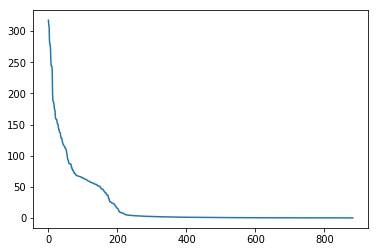

In [187]:
print(X_train_scaled.shape)
print(Y_train.shape)
features_scores = f_regression(X_train_scaled,Y_train)[0]
#print(features_scores)
y = list(features_scores)
myarray = np.asarray(y)
print(-1*np.sort(-1*myarray))
#print(-1*np.sort(myarray-1))
plt.plot(-1*np.sort(-1*myarray))

indices = myarray.argsort()[-50:][::-1]
print(indices)



In [188]:
X_train_subset = train_data_mean[train_data_mean.columns[indices]]
X_test_subset = test_data_mean[train_data_mean.columns[indices]]

#print(X_subset.head(1))

X_train_subset, X_test_subset = fill_NaN(X_train_subset, X_test_subset)
X_train_subset, X_test_subset = scale_data(X_train_subset, X_test_subset)

print(X_train_subset.shape)

Train shape:  (1212, 50)
Test shape:  (776, 50)
Train shape:  (1212, 50)
Test shape:  (776, 50)
(1212, 50)


In [191]:
#model = MLPRegressor(batch_size = 200,validation_fraction=0.05, verbose=True, tol = 0.00000001,learning_rate_init=0.0001)

model = MLPRegressor(learning_rate='constant', 
                        hidden_layer_sizes=(80, 60),
                         activation='logistic', 
                         learning_rate_init=0.0001, 
                         max_iter=15000, 
                         early_stopping =True,
                         validation_fraction=0.1,
                         tol=0.00000000001,
                         alpha=0.1,
                         #n_iter_no_change=100,
                         verbose=True)
model.fit(X_train_subset,Y_train)

#score = cross_val_score((model), X_train_subset, Y_train, scoring='r2', cv=4)
#print(score.mean())

/home/francesco/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 2448.42178018
Validation score: -51.726343
Iteration 2, loss = 2444.70529660
Validation score: -51.647951
Iteration 3, loss = 2441.00777183
Validation score: -51.569600
Iteration 4, loss = 2437.30749103
Validation score: -51.491409
Iteration 5, loss = 2433.62304545
Validation score: -51.413345
Iteration 6, loss = 2429.93646943
Validation score: -51.335516
Iteration 7, loss = 2426.25697270
Validation score: -51.257874
Iteration 8, loss = 2422.59529853
Validation score: -51.180351
Iteration 9, loss = 2418.93133497
Validation score: -51.103045
Iteration 10, loss = 2415.28006973
Validation score: -51.025899
Iteration 11, loss = 2411.63409805
Validation score: -50.948960
Iteration 12, loss = 2408.00670727
Validation score: -50.872037
Iteration 13, loss = 2404.37727825
Validation score: -50.795418
Iteration 14, loss = 2400.76220329
Validation score: -50.718996
Iteration 15, loss = 2397.16179783
Validation score: -50.642771
Iteration 16, loss = 2393.56558398
Validation sco

Iteration 139, loss = 2073.40419690
Validation score: -43.820531
Iteration 140, loss = 2071.40778531
Validation score: -43.778216
Iteration 141, loss = 2069.41277858
Validation score: -43.735999
Iteration 142, loss = 2067.42057520
Validation score: -43.693956
Iteration 143, loss = 2065.43623387
Validation score: -43.651968
Iteration 144, loss = 2063.45551847
Validation score: -43.610028
Iteration 145, loss = 2061.47318572
Validation score: -43.568159
Iteration 146, loss = 2059.49868011
Validation score: -43.526368
Iteration 147, loss = 2057.52608514
Validation score: -43.484620
Iteration 148, loss = 2055.55713787
Validation score: -43.442951
Iteration 149, loss = 2053.58998325
Validation score: -43.401387
Iteration 150, loss = 2051.63319743
Validation score: -43.359880
Iteration 151, loss = 2049.67576480
Validation score: -43.318523
Iteration 152, loss = 2047.72584212
Validation score: -43.277254
Iteration 153, loss = 2045.78084598
Validation score: -43.236052
Iteration 154, loss = 204

Iteration 281, loss = 1799.03492247
Validation score: -38.003664
Iteration 282, loss = 1797.10299664
Validation score: -37.962736
Iteration 283, loss = 1795.17554177
Validation score: -37.921976
Iteration 284, loss = 1793.25999367
Validation score: -37.881288
Iteration 285, loss = 1791.34631687
Validation score: -37.840745
Iteration 286, loss = 1789.43521597
Validation score: -37.800362
Iteration 287, loss = 1787.53766668
Validation score: -37.759946
Iteration 288, loss = 1785.63114951
Validation score: -37.719662
Iteration 289, loss = 1783.73378948
Validation score: -37.679456
Iteration 290, loss = 1781.83999378
Validation score: -37.639300
Iteration 291, loss = 1779.95207413
Validation score: -37.599162
Iteration 292, loss = 1778.06117633
Validation score: -37.559090
Iteration 293, loss = 1776.17316525
Validation score: -37.519030
Iteration 294, loss = 1774.28551979
Validation score: -37.479030
Iteration 295, loss = 1772.40147736
Validation score: -37.439045
Iteration 296, loss = 177

Iteration 427, loss = 1537.25314215
Validation score: -32.447306
Iteration 428, loss = 1535.65843799
Validation score: -32.413366
Iteration 429, loss = 1534.06315352
Validation score: -32.379355
Iteration 430, loss = 1532.46494853
Validation score: -32.345331
Iteration 431, loss = 1530.86616224
Validation score: -32.311321
Iteration 432, loss = 1529.26390687
Validation score: -32.277316
Iteration 433, loss = 1527.66656706
Validation score: -32.243213
Iteration 434, loss = 1526.05487557
Validation score: -32.209116
Iteration 435, loss = 1524.45754480
Validation score: -32.174789
Iteration 436, loss = 1522.83743930
Validation score: -32.140529
Iteration 437, loss = 1521.22570504
Validation score: -32.106127
Iteration 438, loss = 1519.60742923
Validation score: -32.071647
Iteration 439, loss = 1517.98517468
Validation score: -32.037067
Iteration 440, loss = 1516.35626782
Validation score: -32.002408
Iteration 441, loss = 1514.72724096
Validation score: -31.967669
Iteration 442, loss = 151

Iteration 555, loss = 1338.86302543
Validation score: -28.226871
Iteration 556, loss = 1337.40768483
Validation score: -28.196070
Iteration 557, loss = 1335.96020825
Validation score: -28.165168
Iteration 558, loss = 1334.50429615
Validation score: -28.134310
Iteration 559, loss = 1333.05844919
Validation score: -28.103305
Iteration 560, loss = 1331.60239199
Validation score: -28.072313
Iteration 561, loss = 1330.14521381
Validation score: -28.041276
Iteration 562, loss = 1328.69085104
Validation score: -28.010073
Iteration 563, loss = 1327.22411484
Validation score: -27.978854
Iteration 564, loss = 1325.75591047
Validation score: -27.947552
Iteration 565, loss = 1324.28584128
Validation score: -27.916094
Iteration 566, loss = 1322.80673103
Validation score: -27.884589
Iteration 567, loss = 1321.32435531
Validation score: -27.852977
Iteration 568, loss = 1319.83963150
Validation score: -27.821236
Iteration 569, loss = 1318.34868427
Validation score: -27.789322
Iteration 570, loss = 131

Iteration 699, loss = 1135.79645577
Validation score: -23.898354
Iteration 700, loss = 1134.50002466
Validation score: -23.870541
Iteration 701, loss = 1133.19732262
Validation score: -23.842806
Iteration 702, loss = 1131.89816789
Validation score: -23.815088
Iteration 703, loss = 1130.60252136
Validation score: -23.787327
Iteration 704, loss = 1129.29824282
Validation score: -23.759576
Iteration 705, loss = 1127.99931728
Validation score: -23.731754
Iteration 706, loss = 1126.69286530
Validation score: -23.703959
Iteration 707, loss = 1125.39382631
Validation score: -23.676066
Iteration 708, loss = 1124.08887092
Validation score: -23.648171
Iteration 709, loss = 1122.78108158
Validation score: -23.620270
Iteration 710, loss = 1121.47663127
Validation score: -23.592301
Iteration 711, loss = 1120.16672954
Validation score: -23.564278
Iteration 712, loss = 1118.85077618
Validation score: -23.536246
Iteration 713, loss = 1117.54044365
Validation score: -23.508082
Iteration 714, loss = 111

Iteration 844, loss = 949.27139074
Validation score: -19.911480
Iteration 845, loss = 948.09266561
Validation score: -19.886333
Iteration 846, loss = 946.92231482
Validation score: -19.861179
Iteration 847, loss = 945.74671435
Validation score: -19.836102
Iteration 848, loss = 944.57549420
Validation score: -19.811041
Iteration 849, loss = 943.40773178
Validation score: -19.785940
Iteration 850, loss = 942.23508061
Validation score: -19.760877
Iteration 851, loss = 941.06555360
Validation score: -19.735773
Iteration 852, loss = 939.89364688
Validation score: -19.710705
Iteration 853, loss = 938.72362256
Validation score: -19.685649
Iteration 854, loss = 937.55292028
Validation score: -19.660670
Iteration 855, loss = 936.38748569
Validation score: -19.635710
Iteration 856, loss = 935.22505240
Validation score: -19.610744
Iteration 857, loss = 934.05758083
Validation score: -19.585838
Iteration 858, loss = 932.89902653
Validation score: -19.560922
Iteration 859, loss = 931.73565732
Valid

Iteration 980, loss = 798.41041116
Validation score: -16.677467
Iteration 981, loss = 797.36524233
Validation score: -16.654964
Iteration 982, loss = 796.31872588
Validation score: -16.632483
Iteration 983, loss = 795.27404720
Validation score: -16.610029
Iteration 984, loss = 794.22802592
Validation score: -16.587616
Iteration 985, loss = 793.18503352
Validation score: -16.565229
Iteration 986, loss = 792.14574644
Validation score: -16.542829
Iteration 987, loss = 791.10423200
Validation score: -16.520439
Iteration 988, loss = 790.05947174
Validation score: -16.498095
Iteration 989, loss = 789.02105555
Validation score: -16.475754
Iteration 990, loss = 787.98262772
Validation score: -16.453413
Iteration 991, loss = 786.94320842
Validation score: -16.431095
Iteration 992, loss = 785.90578271
Validation score: -16.408797
Iteration 993, loss = 784.86955743
Validation score: -16.386557
Iteration 994, loss = 783.83500446
Validation score: -16.364300
Iteration 995, loss = 782.79919272
Valid

Iteration 1111, loss = 662.82044570
Validation score: -13.760040
Iteration 1112, loss = 661.82869781
Validation score: -13.738653
Iteration 1113, loss = 660.83787238
Validation score: -13.717291
Iteration 1114, loss = 659.84703292
Validation score: -13.695970
Iteration 1115, loss = 658.85940293
Validation score: -13.674661
Iteration 1116, loss = 657.87074839
Validation score: -13.653432
Iteration 1117, loss = 656.88744354
Validation score: -13.632219
Iteration 1118, loss = 655.90690690
Validation score: -13.611058
Iteration 1119, loss = 654.92772733
Validation score: -13.589910
Iteration 1120, loss = 653.94789821
Validation score: -13.568834
Iteration 1121, loss = 652.97089746
Validation score: -13.547834
Iteration 1122, loss = 651.99874725
Validation score: -13.526835
Iteration 1123, loss = 651.02426192
Validation score: -13.505891
Iteration 1124, loss = 650.05512363
Validation score: -13.484950
Iteration 1125, loss = 649.08359567
Validation score: -13.464047
Iteration 1126, loss = 64

Validation score: -10.910811
Iteration 1245, loss = 530.02759451
Validation score: -10.889795
Iteration 1246, loss = 529.05253346
Validation score: -10.868898
Iteration 1247, loss = 528.09470931
Validation score: -10.847928
Iteration 1248, loss = 527.12624472
Validation score: -10.827087
Iteration 1249, loss = 526.16751505
Validation score: -10.806303
Iteration 1250, loss = 525.20938545
Validation score: -10.785512
Iteration 1251, loss = 524.25127624
Validation score: -10.764659
Iteration 1252, loss = 523.28751525
Validation score: -10.743863
Iteration 1253, loss = 522.32958534
Validation score: -10.723036
Iteration 1254, loss = 521.36891680
Validation score: -10.702164
Iteration 1255, loss = 520.40823207
Validation score: -10.681217
Iteration 1256, loss = 519.44163147
Validation score: -10.660178
Iteration 1257, loss = 518.46764304
Validation score: -10.639013
Iteration 1258, loss = 517.48850937
Validation score: -10.617653
Iteration 1259, loss = 516.49876932
Validation score: -10.596

Iteration 1390, loss = 403.49337975
Validation score: -8.140768
Iteration 1391, loss = 402.74979963
Validation score: -8.124476
Iteration 1392, loss = 402.00616068
Validation score: -8.108233
Iteration 1393, loss = 401.26011408
Validation score: -8.092075
Iteration 1394, loss = 400.51609568
Validation score: -8.075897
Iteration 1395, loss = 399.78179177
Validation score: -8.059623
Iteration 1396, loss = 399.03769702
Validation score: -8.043425
Iteration 1397, loss = 398.29679708
Validation score: -8.027303
Iteration 1398, loss = 397.55786613
Validation score: -8.011242
Iteration 1399, loss = 396.81893620
Validation score: -7.995226
Iteration 1400, loss = 396.08904719
Validation score: -7.979130
Iteration 1401, loss = 395.35471295
Validation score: -7.963063
Iteration 1402, loss = 394.61994143
Validation score: -7.947042
Iteration 1403, loss = 393.88463359
Validation score: -7.931068
Iteration 1404, loss = 393.15360952
Validation score: -7.915091
Iteration 1405, loss = 392.41951780
Vali

Iteration 1531, loss = 305.81807715
Validation score: -5.998944
Iteration 1532, loss = 305.07477885
Validation score: -5.982747
Iteration 1533, loss = 304.34529805
Validation score: -5.966674
Iteration 1534, loss = 303.61642890
Validation score: -5.950788
Iteration 1535, loss = 302.89851167
Validation score: -5.935036
Iteration 1536, loss = 302.18405323
Validation score: -5.919440
Iteration 1537, loss = 301.48143010
Validation score: -5.904008
Iteration 1538, loss = 300.78363302
Validation score: -5.888732
Iteration 1539, loss = 300.09069220
Validation score: -5.873552
Iteration 1540, loss = 299.39879107
Validation score: -5.858539
Iteration 1541, loss = 298.72269490
Validation score: -5.843558
Iteration 1542, loss = 298.04606887
Validation score: -5.828665
Iteration 1543, loss = 297.37255121
Validation score: -5.813890
Iteration 1544, loss = 296.70703412
Validation score: -5.799156
Iteration 1545, loss = 296.03765911
Validation score: -5.784584
Iteration 1546, loss = 295.37339777
Vali

Iteration 1676, loss = 218.11113783
Validation score: -4.057776
Iteration 1677, loss = 217.61394992
Validation score: -4.046648
Iteration 1678, loss = 217.11412687
Validation score: -4.035579
Iteration 1679, loss = 216.61713142
Validation score: -4.024528
Iteration 1680, loss = 216.12601356
Validation score: -4.013433
Iteration 1681, loss = 215.62991361
Validation score: -4.002424
Iteration 1682, loss = 215.13435498
Validation score: -3.991469
Iteration 1683, loss = 214.64563897
Validation score: -3.980470
Iteration 1684, loss = 214.15547376
Validation score: -3.969487
Iteration 1685, loss = 213.66341757
Validation score: -3.958550
Iteration 1686, loss = 213.17163061
Validation score: -3.947692
Iteration 1687, loss = 212.68993445
Validation score: -3.936768
Iteration 1688, loss = 212.20155764
Validation score: -3.925909
Iteration 1689, loss = 211.71697408
Validation score: -3.915042
Iteration 1690, loss = 211.23038127
Validation score: -3.904202
Iteration 1691, loss = 210.74415320
Vali

Iteration 1817, loss = 156.80651908
Validation score: -2.677598
Iteration 1818, loss = 156.36825153
Validation score: -2.667416
Iteration 1819, loss = 155.92137631
Validation score: -2.657017
Iteration 1820, loss = 155.45747018
Validation score: -2.646498
Iteration 1821, loss = 155.00167443
Validation score: -2.635672
Iteration 1822, loss = 154.52211545
Validation score: -2.624877
Iteration 1823, loss = 154.04620244
Validation score: -2.614051
Iteration 1824, loss = 153.57237322
Validation score: -2.603188
Iteration 1825, loss = 153.09514974
Validation score: -2.592392
Iteration 1826, loss = 152.62284116
Validation score: -2.581669
Iteration 1827, loss = 152.15468358
Validation score: -2.571059
Iteration 1828, loss = 151.68845095
Validation score: -2.560593
Iteration 1829, loss = 151.23110887
Validation score: -2.550236
Iteration 1830, loss = 150.78170374
Validation score: -2.539990
Iteration 1831, loss = 150.33385742
Validation score: -2.529999
Iteration 1832, loss = 149.89701303
Vali

Iteration 1955, loss = 110.10982437
Validation score: -1.604017
Iteration 1956, loss = 109.84632155
Validation score: -1.597840
Iteration 1957, loss = 109.58223846
Validation score: -1.591710
Iteration 1958, loss = 109.32159626
Validation score: -1.585576
Iteration 1959, loss = 109.05950527
Validation score: -1.579473
Iteration 1960, loss = 108.80137251
Validation score: -1.573331
Iteration 1961, loss = 108.53806936
Validation score: -1.567245
Iteration 1962, loss = 108.27780639
Validation score: -1.561189
Iteration 1963, loss = 108.02109177
Validation score: -1.555074
Iteration 1964, loss = 107.76299231
Validation score: -1.549009
Iteration 1965, loss = 107.50370475
Validation score: -1.542973
Iteration 1966, loss = 107.24615834
Validation score: -1.536959
Iteration 1967, loss = 106.99299996
Validation score: -1.530961
Iteration 1968, loss = 106.73543136
Validation score: -1.525010
Iteration 1969, loss = 106.48160405
Validation score: -1.519051
Iteration 1970, loss = 106.22942713
Vali

Iteration 2092, loss = 77.18379257
Validation score: -0.817075
Iteration 2093, loss = 77.00087402
Validation score: -0.812649
Iteration 2094, loss = 76.81956293
Validation score: -0.808246
Iteration 2095, loss = 76.64009071
Validation score: -0.803841
Iteration 2096, loss = 76.46362314
Validation score: -0.799437
Iteration 2097, loss = 76.28743978
Validation score: -0.795063
Iteration 2098, loss = 76.11050075
Validation score: -0.790743
Iteration 2099, loss = 75.93377153
Validation score: -0.786433
Iteration 2100, loss = 75.76298416
Validation score: -0.782160
Iteration 2101, loss = 75.59012710
Validation score: -0.777942
Iteration 2102, loss = 75.41967291
Validation score: -0.773703
Iteration 2103, loss = 75.24991809
Validation score: -0.769545
Iteration 2104, loss = 75.08078994
Validation score: -0.765445
Iteration 2105, loss = 74.91261235
Validation score: -0.761285
Iteration 2106, loss = 74.74517919
Validation score: -0.757114
Iteration 2107, loss = 74.58128384
Validation score: -0

Iteration 2225, loss = 56.26408137
Validation score: -0.331041
Iteration 2226, loss = 56.09124101
Validation score: -0.326908
Iteration 2227, loss = 55.91691213
Validation score: -0.322156
Iteration 2228, loss = 55.74430280
Validation score: -0.318119
Iteration 2229, loss = 55.57440572
Validation score: -0.313764
Iteration 2230, loss = 55.41220684
Validation score: -0.309916
Iteration 2231, loss = 55.24873670
Validation score: -0.306201
Iteration 2232, loss = 55.09378859
Validation score: -0.302362
Iteration 2233, loss = 54.93799541
Validation score: -0.298893
Iteration 2234, loss = 54.78957583
Validation score: -0.295681
Iteration 2235, loss = 54.64044826
Validation score: -0.292051
Iteration 2236, loss = 54.49049814
Validation score: -0.288740
Iteration 2237, loss = 54.34906880
Validation score: -0.285030
Iteration 2238, loss = 54.21180351
Validation score: -0.281173
Iteration 2239, loss = 54.06358759
Validation score: -0.278253
Iteration 2240, loss = 53.93038452
Validation score: -0

Iteration 2365, loss = 41.34180293
Validation score: 0.045940
Iteration 2366, loss = 41.26930201
Validation score: 0.047956
Iteration 2367, loss = 41.19254967
Validation score: 0.049820
Iteration 2368, loss = 41.11758184
Validation score: 0.051778
Iteration 2369, loss = 41.04647652
Validation score: 0.053906
Iteration 2370, loss = 40.97102484
Validation score: 0.055994
Iteration 2371, loss = 40.89742895
Validation score: 0.057970
Iteration 2372, loss = 40.82457228
Validation score: 0.059932
Iteration 2373, loss = 40.75015089
Validation score: 0.061790
Iteration 2374, loss = 40.67946932
Validation score: 0.063598
Iteration 2375, loss = 40.60910589
Validation score: 0.065564
Iteration 2376, loss = 40.53483207
Validation score: 0.067564
Iteration 2377, loss = 40.46200098
Validation score: 0.069569
Iteration 2378, loss = 40.39272388
Validation score: 0.071568
Iteration 2379, loss = 40.31836656
Validation score: 0.073635
Iteration 2380, loss = 40.25052392
Validation score: 0.075705
Iteratio

Iteration 2516, loss = 33.03488443
Validation score: 0.288472
Iteration 2517, loss = 32.99579683
Validation score: 0.289654
Iteration 2518, loss = 32.95721156
Validation score: 0.290884
Iteration 2519, loss = 32.91993149
Validation score: 0.292125
Iteration 2520, loss = 32.88282036
Validation score: 0.293364
Iteration 2521, loss = 32.84363782
Validation score: 0.294551
Iteration 2522, loss = 32.80703489
Validation score: 0.295673
Iteration 2523, loss = 32.76765573
Validation score: 0.296842
Iteration 2524, loss = 32.73539840
Validation score: 0.298042
Iteration 2525, loss = 32.69662739
Validation score: 0.299242
Iteration 2526, loss = 32.66174759
Validation score: 0.300420
Iteration 2527, loss = 32.62227064
Validation score: 0.301564
Iteration 2528, loss = 32.58573146
Validation score: 0.302774
Iteration 2529, loss = 32.55015584
Validation score: 0.303983
Iteration 2530, loss = 32.51365950
Validation score: 0.305195
Iteration 2531, loss = 32.47786095
Validation score: 0.306369
Iteratio

Iteration 2666, loss = 28.83462405
Validation score: 0.428206
Iteration 2667, loss = 28.81382529
Validation score: 0.428910
Iteration 2668, loss = 28.79595821
Validation score: 0.429614
Iteration 2669, loss = 28.77845079
Validation score: 0.430293
Iteration 2670, loss = 28.75634362
Validation score: 0.430948
Iteration 2671, loss = 28.73622447
Validation score: 0.431614
Iteration 2672, loss = 28.71615778
Validation score: 0.432301
Iteration 2673, loss = 28.69686813
Validation score: 0.432991
Iteration 2674, loss = 28.67729542
Validation score: 0.433676
Iteration 2675, loss = 28.65830665
Validation score: 0.434331
Iteration 2676, loss = 28.64190673
Validation score: 0.435033
Iteration 2677, loss = 28.62413627
Validation score: 0.435760
Iteration 2678, loss = 28.60111019
Validation score: 0.436400
Iteration 2679, loss = 28.57874076
Validation score: 0.437061
Iteration 2680, loss = 28.55944244
Validation score: 0.437715
Iteration 2681, loss = 28.53998606
Validation score: 0.438380
Iteratio

Iteration 2808, loss = 26.55609665
Validation score: 0.506735
Iteration 2809, loss = 26.54435642
Validation score: 0.507080
Iteration 2810, loss = 26.52924154
Validation score: 0.507628
Iteration 2811, loss = 26.51505841
Validation score: 0.508083
Iteration 2812, loss = 26.50417531
Validation score: 0.508552
Iteration 2813, loss = 26.49136452
Validation score: 0.508969
Iteration 2814, loss = 26.48040680
Validation score: 0.509377
Iteration 2815, loss = 26.46901220
Validation score: 0.509730
Iteration 2816, loss = 26.45317365
Validation score: 0.510182
Iteration 2817, loss = 26.43994852
Validation score: 0.510579
Iteration 2818, loss = 26.42861133
Validation score: 0.510999
Iteration 2819, loss = 26.41511132
Validation score: 0.511314
Iteration 2820, loss = 26.40392143
Validation score: 0.511694
Iteration 2821, loss = 26.39179519
Validation score: 0.512034
Iteration 2822, loss = 26.38056091
Validation score: 0.512410
Iteration 2823, loss = 26.36872815
Validation score: 0.512785
Iteratio

Iteration 2941, loss = 25.12778362
Validation score: 0.554298
Iteration 2942, loss = 25.11853583
Validation score: 0.554592
Iteration 2943, loss = 25.10975460
Validation score: 0.554881
Iteration 2944, loss = 25.10099801
Validation score: 0.555159
Iteration 2945, loss = 25.09131071
Validation score: 0.555397
Iteration 2946, loss = 25.08412694
Validation score: 0.555655
Iteration 2947, loss = 25.07617902
Validation score: 0.555850
Iteration 2948, loss = 25.06859161
Validation score: 0.556282
Iteration 2949, loss = 25.06420399
Validation score: 0.556580
Iteration 2950, loss = 25.05278125
Validation score: 0.556780
Iteration 2951, loss = 25.04225689
Validation score: 0.557166
Iteration 2952, loss = 25.03217335
Validation score: 0.557310
Iteration 2953, loss = 25.02387368
Validation score: 0.557468
Iteration 2954, loss = 25.01391931
Validation score: 0.557670
Iteration 2955, loss = 25.00700216
Validation score: 0.557865
Iteration 2956, loss = 24.99921851
Validation score: 0.558216
Iteratio

Iteration 3074, loss = 24.14980118
Validation score: 0.584958
Iteration 3075, loss = 24.14464529
Validation score: 0.585099
Iteration 3076, loss = 24.13828506
Validation score: 0.585320
Iteration 3077, loss = 24.13687808
Validation score: 0.585597
Iteration 3078, loss = 24.12846599
Validation score: 0.585586
Iteration 3079, loss = 24.12081792
Validation score: 0.585547
Iteration 3080, loss = 24.11578282
Validation score: 0.585687
Iteration 3081, loss = 24.11262688
Validation score: 0.585711
Iteration 3082, loss = 24.10614658
Validation score: 0.586149
Iteration 3083, loss = 24.10271228
Validation score: 0.586645
Iteration 3084, loss = 24.09274766
Validation score: 0.586886
Iteration 3085, loss = 24.08787013
Validation score: 0.586990
Iteration 3086, loss = 24.08470320
Validation score: 0.587242
Iteration 3087, loss = 24.07620348
Validation score: 0.587297
Iteration 3088, loss = 24.07270917
Validation score: 0.587384
Iteration 3089, loss = 24.06184245
Validation score: 0.587632
Iteratio

MLPRegressor(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(80, 60), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=15000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-11, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [192]:
y_pred = model.predict(X_test_subset)
test_set["y"] = y_pred
print(y_pred)

[76.1767633  73.39308756 74.93653561 63.81670775 76.73501598 62.60946238
 76.09858195 63.73686651 75.39391995 64.53426641 76.04004167 62.52858405
 67.64166433 75.60402451 76.19547065 74.95740401 58.62515722 74.80758093
 73.67729917 65.66263985 63.43481488 61.86282955 75.85192151 66.2839293
 74.72734196 59.45358346 59.8540276  76.03032376 76.97345097 70.29011933
 51.99800502 74.90087254 61.11722633 64.17485272 66.60400729 72.4346097
 76.20262844 56.62398202 63.95722809 73.10761078 75.6585673  76.65803011
 59.54306506 65.92281151 64.3467478  61.21498737 76.69456472 76.82114315
 76.48790972 76.86336929 60.43625882 62.77174748 60.21029267 63.12236221
 59.19719219 66.18583016 76.58265732 56.72534251 56.33771127 74.62955105
 76.25782728 75.71506143 76.86083334 64.58571712 63.85985911 64.53067488
 76.51532691 75.36257374 56.64017072 60.02734926 76.40006017 64.68573108
 76.05491606 75.89261056 62.41619687 64.89848947 67.32317536 71.01258602
 77.09848743 59.54493655 65.67646093 68.30259602 75.5

In [193]:
# create submission
test_set[["id", "y"]].to_csv("submissions/fifth_mlp.csv", index= False)